In [1]:
!pip install openCV-python

In [2]:
!pip install tensorflow --timeout 200

In [3]:
import cv2

In [4]:
cloud= cv2.imread('C:/Users/Hasseb/Downloads/Weather Forecast Data/train/cloudy/cloudy2.jpg')

In [5]:
import matplotlib.pyplot as plt

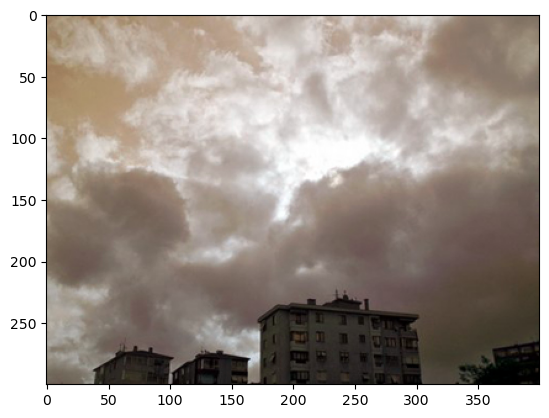

In [6]:
plt.imshow(cloud)

In [7]:
rainy= cv2.imread('C:/Users/Hasseb/Downloads/Weather Forecast Data/train/rainy/rain18.jpg')

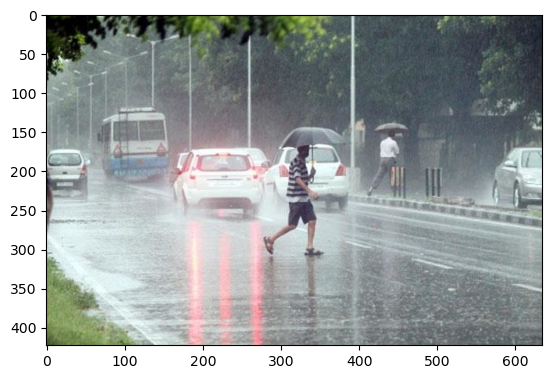

In [8]:
plt.imshow(cv2.cvtColor(rainy, cv2.COLOR_BGR2RGB))

In [9]:
rainy.shape

(423, 635, 3)

In [10]:
cloud.shape

(300, 400, 3)

In [3]:
!pip install keras

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
image_gen= ImageDataGenerator(rotation_range=30, #Rotation of Image
                              width_shift_range=0.5,
                             height_shift_range=0.2,
                             rescale=1/255,
                             brightness_range=[0.8, 1.2],
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [14]:
train_img = image_gen.flow_from_directory('C:/Users/Hasseb/Downloads/Weather Forecast Data/train')

Found 1500 images belonging to 5 classes.


In [15]:
image_gen.flow_from_directory('C:/Users/Hasseb/Downloads/Weather Forecast Data/test')

Found 30 images belonging to 5 classes.


In [16]:
train_img.class_indices

{'cloudy': 0, 'foggy': 1, 'rainy': 2, 'shine': 3, 'sunrise': 4}

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization

model = Sequential()

# First convolutional layer with Batch Normalization
model.add(Conv2D(filters=32, kernel_size=(4, 4), input_shape=(150, 150, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Adding more convolutional layers
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third and fourth convolutional layers
model.add(Conv2D(filters=40, kernel_size=(5, 5), activation='silu'))
model.add(Conv2D(filters=65, kernel_size=(8, 8), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the feature maps to a 1D vector
model.add(Flatten())

# Fully connected layer
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer for 5 classes (softmax activation for multi-class classification)
model.add(Dense(5, activation='softmax'))



C:\Users\Hasseb\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use categorical crossentropy for multi-class classification
              metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 147, 147, 32)        │           1,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 147, 147, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 73, 73, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 71, 71, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 71, 71, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 33, 33, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 33, 33, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 40)          │         128,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 5, 5, 65)            │         166,465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 2, 2, 65)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 260)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         133,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 525,518 (2.00 MB)

 Trainable params: 525,070 (2.00 MB)

 Non-trainable params: 448 (1.75 KB)

In [36]:
train_img_gen = image_gen.flow_from_directory(
    'C:/Users/Hasseb/Downloads/Weather Forecast Data/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_img_gen = image_gen.flow_from_directory(
    'C:/Users/Hasseb/Downloads/Weather Forecast Data/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1500 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [37]:
test_img_gen = ImageDataGenerator(rescale=1./255).flow_from_directory(
    'C:/Users/Hasseb/Downloads/Weather Forecast Data/test',
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical'
)

Found 30 images belonging to 5 classes.


In [46]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)

# Fit the model with early stopping and model checkpoint
results = model.fit(train_img_gen,
                    epochs=50,  # Increased from 30 to 50
                    steps_per_epoch=47,
                    validation_data=test_img_gen,
                    validation_steps=1,
                    callbacks=[early_stopping, model_checkpoint])




Epoch 1/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step - accuracy: 0.7026 - loss: 0.8277 - val_accuracy: 0.7000 - val_loss: 1.0250
Epoch 2/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.6598 - loss: 0.9494 - val_accuracy: 0.6000 - val_loss: 1.1271
Epoch 4/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.6804 - loss: 0.8745 - val_accuracy: 0.4667 - val_loss: 1.3353
Epoch 6/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 143s 3s/step - accuracy: 0.7248 - loss: 0.8105 - val_accuracy: 0.5000 - val_loss: 1.6523
Epoch 8/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/50
47/47 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.6852 - loss: 0.9001 - val_accuracy: 0.5000 - val_loss: 1.3

In [47]:
results.history['accuracy']

[0.7013333439826965,
 0.0,
 0.6693333387374878,
 0.0,
 0.6933333277702332,
 0.0,
 0.7099999785423279,
 0.0,
 0.6986666917800903,
 0.0,
 0.75,
 0.0,
 0.7406666874885559,
 0.0,
 0.7266666889190674,
 0.0,
 0.7459999918937683,
 0.0,
 0.7580000162124634,
 0.0,
 0.7613333463668823]

Test the model with Sunrise Image

In [79]:
import numpy as np
from keras.preprocessing import image

Image_test = 'C:/Users/Hasseb/Downloads/sunrise1.jpg'

Image_test = image.load_img(Image_test, target_size=(150, 150))

Image_test = image.img_to_array(Image_test)

Image_test = np.expand_dims(Image_test, axis=0)
Image_test = Image_test/255

In [80]:
prediction_prob = model.predict(Image_test)
print("Probabilities for each class (formatted):")
for i, prob in enumerate(prediction_prob[0]):
    print(f"Class {i}: {prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Probabilities for each class (formatted):
Class 0: 0.00
Class 1: 0.01
Class 2: 0.00
Class 3: 0.00
Class 4: 0.99


Its Work Fine

In [81]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_img_gen, steps=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.7667 - loss: 0.8456
Test Loss: 0.8456307053565979
Test Accuracy: 0.7666666507720947


In [4]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import tensorflow as tf
base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')

base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Converts the feature maps to a single 1D vector per image
    Dropout(0.5),  # Dropout for regularization
    Dense(512, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # More dropout to avoid overfitting
    Dense(5, activation='softmax')  # Output layer for 5 classes (adjust according to your labels)
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Smaller learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\Hasseb\AppData\Local\Temp\ipykernel_11612\1785325423.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(150, 150, 3), include_top=False, weights='imagenet')


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         655,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,916,421 (11.13 MB)

 Trainable params: 658,437 (2.51 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [7]:
train_datagen = ImageDataGenerator(
    rotation_range=30, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rescale=1./255
)

# Normalization for test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_img_gen = train_datagen.flow_from_directory('C:/Users/Hasseb/Downloads/Weather Forecast Data/train',
                                                  target_size=(150, 150),
                                                  batch_size=32,
                                                  class_mode='categorical')

test_img_gen = test_datagen.flow_from_directory('C:/Users/Hasseb/Downloads/Weather Forecast Data/test',
                                                target_size=(150, 150),
                                                batch_size=32,
                                                class_mode='categorical')

Found 1500 images belonging to 5 classes.
Found 30 images belonging to 5 classes.


In [9]:
history = model.fit(train_img_gen,
                    epochs=40,
                    steps_per_epoch=len(train_img_gen),
                    validation_data=test_img_gen,
                    validation_steps=len(test_img_gen))

Epoch 1/40


C:\Users\Hasseb\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 113s 2s/step - accuracy: 0.2359 - loss: 2.5568 - val_accuracy: 0.9000 - val_loss: 0.7350
Epoch 2/40


C:\Users\Hasseb\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.4896 - loss: 1.3984 - val_accuracy: 0.9333 - val_loss: 0.4302
Epoch 4/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.5959 - loss: 1.1474 - val_accuracy: 0.9000 - val_loss: 0.3384
Epoch 6/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6781 - loss: 0.9186 - val_accuracy: 0.9000 - val_loss: 0.2848
Epoch 8/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7069 - loss: 0.8245 - val_accuracy: 0.9000 - val_loss: 0.2531
Epoch 10/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/40
47/47 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/

In [11]:
history.history['accuracy']

[0.30133333802223206,
 0.0,
 0.5113333463668823,
 0.0,
 0.6213333606719971,
 0.0,
 0.6800000071525574,
 0.0,
 0.718666672706604,
 0.0,
 0.7566666603088379,
 0.0,
 0.7459999918937683,
 0.0,
 0.7799999713897705,
 0.0,
 0.7926666736602783,
 0.0,
 0.8080000281333923,
 0.0,
 0.8013333082199097,
 0.0,
 0.8186666369438171,
 0.0,
 0.8166666626930237,
 0.0,
 0.8100000023841858,
 0.0,
 0.8399999737739563,
 0.0,
 0.809333324432373,
 0.0,
 0.8273333311080933,
 0.0,
 0.840666651725769,
 0.0,
 0.831333339214325,
 0.0,
 0.843999981880188,
 0.0]

In [12]:
import numpy as np
from keras.preprocessing import image

Image_test = 'C:/Users/Hasseb/Downloads/sunrise1.jpg'

Image_test = image.load_img(Image_test, target_size=(150, 150))

Image_test = image.img_to_array(Image_test)

Image_test = np.expand_dims(Image_test, axis=0)
Image_test = Image_test/255

In [13]:
prediction_prob = model.predict(Image_test)
print("Probabilities for each class (formatted):")
for i, prob in enumerate(prediction_prob[0]):
    print(f"Class {i}: {prob:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Probabilities for each class (formatted):
Class 0: 0.00
Class 1: 0.02
Class 2: 0.00
Class 3: 0.00
Class 4: 0.97


In [12]:
test_loss, test_accuracy = model.evaluate(test_img_gen, steps=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9000 - loss: 0.1828
Test Loss: 0.1827528029680252
Test Accuracy: 0.8999999761581421


Custom CNN vs Pre Trained Model MobileNetV2
The difference in accuracy indicates that MobileNetV2, a pre-trained model using transfer learning, performs significantly better than the custom CNN model that i created on very small weather data

In [13]:
model.save('weather_prediction_model.h5')

In [14]:
model.save('weather_predictor.keras')

In [28]:
try:
    model = load_model('weather_predictor.keras')
    print("Model loaded successfully")
except Exception as e:
    print(f"Error loading model: {e}")

Model loaded successfully


C:\Users\Hasseb\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [15]:
!pip install gradio

     ---------------------------------------- 0.0/51.7 kB ? eta -:--:--
     ---------------------------------------- 51.7/51.7 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/18.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/18.1 MB 1.9 MB/s eta 0:00:10
   ---------------------------------------- 0.1/18.1 MB 787.7 kB/s eta 0:00:23
   ---------------------------------------- 0.1/18.1 MB 1.1 MB/s eta 0:00:17
   ---------------------------------------- 0.2/18.1 MB 1.2 MB/s eta 0:00:15
    --------------------------------------- 0.3/18.1 MB 1.3 MB/s eta 0:00:14
    --------------------------------------- 0.3/18.1 MB 1.3 MB/s eta 0:00:14
    --------------------------------------- 0.4/18.1 MB 1.3 MB/s eta 0:00:14
    --------------------------------------- 0.5/18.1 MB 1.3 MB/s eta 0:00:14
   - -------------------------------------- 0.5/18.1 MB 1.4 MB/s eta 0:00:13
   - -------------------------------------- 0.5/18.1 MB 1.3 MB/s eta 0:00:14
   - -

In [36]:
import gradio as gr
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Load the saved model
model = tf.keras.models.load_model('weather_predictor.keras')  # Replace with your model path

# Define a function to preprocess the input image and make predictions
def predict_weather(img):
    img = img.convert('RGB')  # Convert to RGB if not already
    img = img.resize((150, 150))  # Resize the image to match model input size
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Normalize the image
    predictions = model.predict(img)
    class_labels = ['cloudy', 'foggy', 'rainy', 'shine', 'sunrise']  # Update labels as necessary
    predicted_class = class_labels[np.argmax(predictions)]
    return predicted_class

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_weather,
    inputs=gr.Image(type="pil"),  # Use PIL image type, no shape argument needed
    outputs=gr.Textbox(),  # Output as a text box
    title="Weather Prediction Model",
    description="Upload an image to predict the weather condition (sunny, rainy, cloudy, etc.)."
)

# Launch the app
iface.launch()


C:\Users\Hasseb\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Running on local URL:  http://127.0.0.1:7870

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
